# Visualization of cardinality of equioutput transformations

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib agg

import visualization
import math
import numpy as np

In [2]:
def tanh_cardinality(hidden):
    return 2**hidden

def permutation_cardinality(hidden):
    return math.factorial(hidden)

def tanh_layer_cardinality(hidden):
    return permutation_cardinality(hidden) * tanh_cardinality(hidden)

def tanh_mlp_cardinalities(hidden_layers_sizes):
    permutation = 1
    tanh = 1
    total = 1
    for layer_size in hidden_layers_sizes:
        permutation *= permutation_cardinality(layer_size)
        tanh *= tanh_cardinality(layer_size)
        total *= tanh_layer_cardinality(layer_size)
    return permutation, tanh, total

## Example: single layer MLP with tanh activation

In [5]:
layer_size = 128
cardinalities = np.zeros((layer_size, 3), dtype=np.float64)

for i in range(layer_size):
    current_cardinalities = tanh_mlp_cardinalities([i])
    cardinalities[i, 0] = current_cardinalities[0]
    cardinalities[i, 1] = current_cardinalities[1]
    cardinalities[i, 2] = current_cardinalities[2]

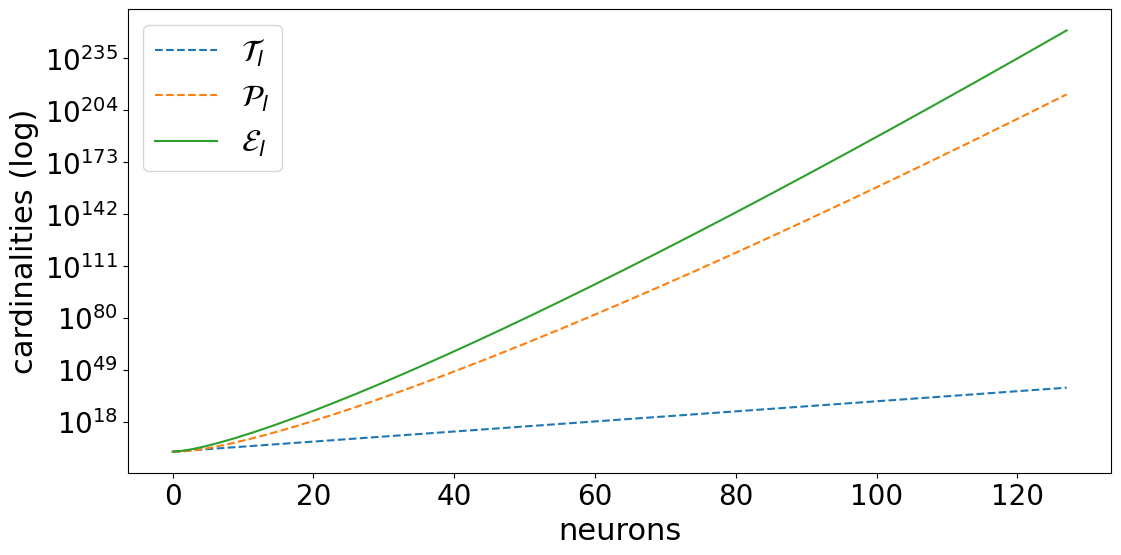

In [6]:
figure = visualization.CardinalityFigure(
    settings=visualization.settings.SettingsCardinalityFigure(textsize=22)
)
figure.plot(cardinalities)